# Alina Greenberg

<br>
<br>
<hr class="dotted">
<br>
<br>

<h1><center>Brain Stroke Prediction</center></h1>

<h1><center><img src="https://i.ytimg.com/vi/8bZQzVOXgRM/sddefault.jpg"/></center></h1>

## What is a Stroke?
A stroke is a medical condition in which poor blood flow to the brain causes cell death.<br>
<br>
<b>There are two main types of stroke:</b>
<br>
(1) Ischemic, due to lack of blood flow.<br>
(2) Hemorrhagic, due to bleeding. <br>
<br>
Both cause parts of the brain to stop functioning properly.

## Context of Dataset:
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.<br>
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.<br> 
Each row in the data provides relavant information about the patient.

## Link to dataset file:
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

<br>
<br>
<hr class="dotted">
<br>
<br>

In this notebook, we will try to understand the characteristics of the parameters that may affect a patient if he/she likely to get stroke.

# The project consists of the following sections:

1. Data Reading
2. Exploratory Data Analysis and Data Cleaning
3. Data Visualization
4. Feature Importance
5. Feature Engineering
6. Splitting the data in training and testing sets
7. Assessing multiple algorithms
8. Overfitting
9. Evaluation And Benchmark

<br>
<br>
<hr class="dotted">
<br>
<br>

# Loading Required Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as math

<br>
<br>
<hr class="dotted">
<br>
<br>

# 1. Data Reading

In [2]:
# Import Stroke dataset into a pandas data frame:
df_stroke = pd.read_csv(r'C:\Users\alina\Desktop\BDA\My Project\Stroke Prediction Dataset\healthcare-dataset-stroke-data.csv')

# Show the dataframe:
df_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


We have 5110 examples and 12 columns (11 features\variables and one label).

In [3]:
# check unique values of each column:
for column in df_stroke.columns:
    print('Column: {} - Unique Values: {}'.format(column, df_stroke[column].unique()))

Column: id - Unique Values: [ 9046 51676 31112 ... 19723 37544 44679]
Column: gender - Unique Values: ['Male' 'Female' 'Other']
Column: age - Unique Values: [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.6

<br>

#### Columns
 
These the descriptions of the variables in this dataset:

<table>
    <tr><th> id </th><td> Unique identifier </td></tr>
    <tr><th> gender </th><td> Whether the patient is a female or a male or other </td></tr>
    <tr><th> age </th><td> Age of the patient </td></tr>
    <tr><th> hypertension </th><td> Whether the patient has hypertension or not( 0 - No, 1 - Yes) </td></tr>
    <tr><th> heart_disease </th><td> Whether the patient has any heart diseases or not( 0 - No, 1 - Yes) </td></tr>
    <tr><th> ever_married </th><td> Whether the patient has ever been married or not </td></tr>
    <tr><th> work_type </th><td> The patient’s work type(Private, Self employed, Govt job, children or Never worked) </td></tr>
    <tr><th> Residence_type </th><td> Rural or Urban </td></tr>
    <tr><th> avg_glucose_level </th><td> Average glucose level in blood </td></tr>
    <tr><th> bmi </th><td> Body mass index </td></tr>  
    <tr><th> smoking_status </th><td> The patient’s smoking status(formerly smoked, never smoked, smokes or Unknown*) </td></tr>
    <tr><th> stroke </th><td> patient had a stroke or not(0 - No, 1 - Yes) </td></tr>
</table>
<br>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient.

<br>
<br>
<hr class="dotted">
<br>
<br>

# 2. Exploratory Data Analysis and Data Cleaning

Exploratory data analysis consists of analyzing the main characteristics of a data set usually by means of visualization methods and summary statistics.<br> 
The objective is to understand the data, discover patterns and anomalies, and check assumptions before performing further evaluations.

### Missing values and data types:

At the beginning of EDA, we want to know as much information as possible about the data, this is when the pandas.<br>
DataFrame.info method comes in handy.<br>
This method prints a concise summary of the data frame, including the column names and their data types, the number of non-null values, and the amount of memory used by the data frame.

In [4]:
# Summary of the data frame:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


As shown above, the data set contains 5110 observations and 12 columns.<br>
Apparently, there are null values on the column ibm; however, we observe that the age, avg_glucose_level and bmi columns were wrongly detected as a float, therefore, we should to change the type of those columns to int.<br>

#### age, avg_glucose_level and bmi columns:

In [5]:
# Converting Multiple columns to int:
df_stroke = df_stroke.astype({"age":"int","avg_glucose_level":"int"})

# Convert "bmi" from float to int and replace NaN values to -1:
df_stroke['bmi'] = df_stroke['bmi'].fillna(-1).astype(int)

In [6]:
# We need to check if the change we made was successful:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5110 non-null   int64 
 1   gender             5110 non-null   object
 2   age                5110 non-null   int32 
 3   hypertension       5110 non-null   int64 
 4   heart_disease      5110 non-null   int64 
 5   ever_married       5110 non-null   object
 6   work_type          5110 non-null   object
 7   Residence_type     5110 non-null   object
 8   avg_glucose_level  5110 non-null   int32 
 9   bmi                5110 non-null   int32 
 10  smoking_status     5110 non-null   object
 11  stroke             5110 non-null   int64 
dtypes: int32(3), int64(4), object(5)
memory usage: 419.3+ KB


In [7]:
# check unique values of each column:
for column in df_stroke.columns:
    print('Column: {} - Unique Values: {}'.format(column, df_stroke[column].unique()))

Column: id - Unique Values: [ 9046 51676 31112 ... 19723 37544 44679]
Column: gender - Unique Values: ['Male' 'Female' 'Other']
Column: age - Unique Values: [67 61 80 49 79 81 74 69 59 78 54 50 64 75 60 57 71 52 82 65 58 42 48 72
 63 76 39 77 73 56 45 70 66 51 43 68 47 53 38 55  1 46 32 14  3  8 37 40
 35 20 44 25 27 23 17 13  4 16 22 30 29 11 21 18 33 24 34 36  0 41  5 26
 31  7 12 62  2  9 15 28 10 19  6]
Column: hypertension - Unique Values: [0 1]
Column: heart_disease - Unique Values: [1 0]
Column: ever_married - Unique Values: ['Yes' 'No']
Column: work_type - Unique Values: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Column: Residence_type - Unique Values: ['Urban' 'Rural']
Column: avg_glucose_level - Unique Values: [228 202 105 171 174 186  70  94  76  58  80 120 104 219 214 167 191 221
  89 217 193 233 208 102 100 189 195 211 212  83 196 252  84  74  92  60
  78  71 144  90 213 243 109 107  99  75 127 124 197  59 237 194 180 185
  61  93 113  86  72  62 179 

#### Remove ID column:
The ID column is useless to explain whether a patient will be likely to get stroke or not.<br>
Therefore, I drop this column from the data set.

In [8]:
# drop the ID column from the dataset:
df_stroke.drop(columns = 'id', inplace = True)

#### Work Type Column:

As shown below, some work type denominations contain a special characters.<br>
Therefore, we remove those characters from the entries of the work type column.

In [9]:
# Unique elements of the PaymentMethod column:
df_stroke.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [10]:
df_stroke['work_type'] = df_stroke['work_type'].str.replace('[_,-]', " ")

C:\Users\alina\AppData\Local\Temp\ipykernel_8748\1396559474.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_stroke['work_type'] = df_stroke['work_type'].str.replace('[_,-]', " ")


In [11]:
df_stroke.work_type.unique()

array(['Private', 'Self employed', 'Govt job', 'children', 'Never worked'],
      dtype=object)

In [12]:
df_stroke['work_type'] = df_stroke['work_type'].str.lower()

In [13]:
df_stroke.work_type.unique()

array(['private', 'self employed', 'govt job', 'children', 'never worked'],
      dtype=object)

#### Gender column:

In [14]:
# Observations of 'Other' in the gender column:
df_stroke.loc[df_stroke["gender"] == 'Other', :]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26,0,0,No,private,Rural,143,22,formerly smoked,0


We only have one row with the value "Other", so this row is not enough to determine the level of influence on the label.<br>
So, I decide to remove this observation from the data set.

In [15]:
# Drop observation with Other values:
df_stroke = df_stroke.drop(index = 3116)

In [16]:
# Convert column values to lowercase:
df_stroke["gender"] = df_stroke["gender"].str.lower()

#### Smoking Status Column:

In [17]:
df_stroke.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [18]:
# Convert column values to lowercase:
df_stroke['smoking_status'] = df_stroke['smoking_status'].str.lower()

In [19]:
df_stroke.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'unknown'],
      dtype=object)

#### Hypertension And Heart Disease Columns:

In [20]:
df_stroke['heart_disease'] = df_stroke['heart_disease'].map({0: 'no', 1: 'yes'})
df_stroke['hypertension'] = df_stroke['hypertension'].map({0: 'no', 1: 'yes'})

#### Residence Type And Ever Married Columns - Converting column values to lowercase:

In [21]:
df_stroke['ever_married'] = df_stroke['ever_married'].str.lower()
df_stroke['Residence_type'] = df_stroke['Residence_type'].str.lower()

## Final DataFrame:

In [22]:
df_stroke.reset_index(drop = True, inplace = True)

In [23]:
# Rename columns to lower letters:
df_stroke = df_stroke.rename(columns = str.lower)
df_stroke.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67,no,yes,yes,private,urban,228,36,formerly smoked,1
1,female,61,no,no,yes,self employed,rural,202,-1,never smoked,1
2,male,80,no,yes,yes,private,rural,105,32,never smoked,1
3,female,49,no,no,yes,private,urban,171,34,smokes,1
4,female,79,yes,no,yes,self employed,rural,174,24,never smoked,1


<br>
<br>
<hr class="dotted">
<br>
<br>

# 3. Data Visualization
In this section, we analyze the data by using visualization.

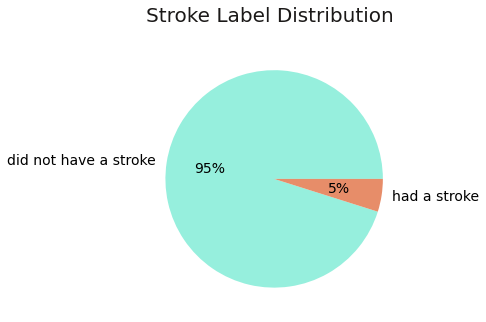

We have 5109 patients but only 249 of them had stroke (4.873752%)


In [24]:
# What is the label distibution:
labels = ['did not have a stroke', 'had a stroke']
fig = plt.figure(figsize = (5, 5)) 
df_stroke['stroke'].value_counts(normalize = True).plot(kind = 'pie',y = df_stroke.stroke.value_counts(normalize = True), labels = labels, autopct = '%1.0f%%', colors = ['#96EFDD','#E78D69'], textprops = {'fontsize': 14})
plt.suptitle('Stroke Label Distribution', fontsize = 20, color = '#1B1918')
plt.axis('off')
plt.show()

# Continue
patients = len(df_stroke)
stroke = sum(df_stroke['stroke'])

# Print the output below using the "print" function:
print("We have %d patients but only %d of them had stroke (%f%%)" % (patients, stroke, (stroke/patients*100)))

### Work Type Distribution

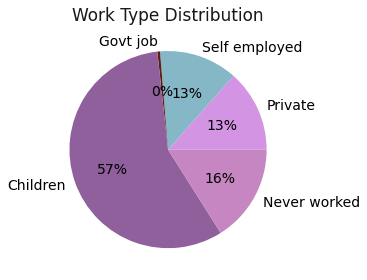

In [25]:
Sum_Work_Type = df_stroke.groupby('work_type')['work_type'].count()

# show absolute values in 'work_type' groups:
total = int(np.sum(df_stroke['work_type'].count()))
axlabels = ["Private", "Self employed", "Govt job", "Children", 'Never worked']
fig, ax = plt.subplots()
ax.pie(Sum_Work_Type, labels = axlabels, autopct = '%1.f%%', colors = ['#D395E3', '#86B7C6', '#5F1D14', '#8F609B', '#C686C1'], textprops = {'fontsize': 14})
plt.title('Work Type Distribution', fontsize = 17, color = '#1B1918')
plt.tight_layout()
plt.show()

It can be seen that work type - 'Govt job' is less than 1 percent.<br>
Therefore, in the near future, it is necessary to investigate those rows and decide whether to keep these rows or delete them.

### Numerical Variables Distribution
The following plots show the distribution of Age, BMI, and Average Glucose Level by stroke.<br> 
For all numeric attributes, the distributions of both classes (did not have a stroke and had a stroke) are different which suggests that all of the attributes will be useful to determine whether or not a patient is likely to get stroke.

In [26]:
def histogram_plots(columns_to_plot, super_title):
    # set number of rows and number of columns
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize = (12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize = 22, y = .95)

    # loop to each demographic column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # histograms for each class (normalized histogram)
        df_stroke[df_stroke['stroke'] == 0][column].plot(kind = 'hist', ax = ax, density = True, alpha = 0.5, color = 'springgreen', label = 'did not have a stroke')
        df_stroke[df_stroke['stroke'] == 1][column].plot(kind = 'hist', ax = ax, density = True, alpha = 0.5, color = 'salmon', label = 'had a stroke')
        
        # set the legend in the upper right corner
        ax.legend(loc = "upper right", bbox_to_anchor = (0.5, 0.5, 0.5, 0.5),title = 'stroke', fancybox = True)

        # set title and labels
        ax.set_title('Distribution of ' + column + ' by stroke', fontsize = 16, loc = 'left')

        ax.tick_params(rotation = 'auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

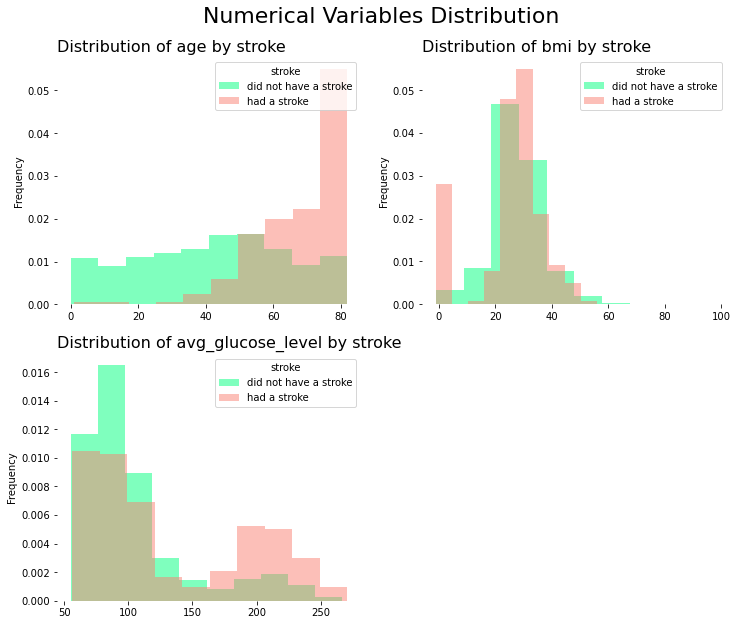

In [27]:
# Patient's numerical variables column names:
Numerical_Variables = ['age', 'bmi', 'avg_glucose_level']
# histogram of patient's numerical variables: 
histogram_plots(Numerical_Variables, 'Numerical Variables Distribution')

<b>We can extract the following conclusions by analyzing the histograms above:</b><br>
(1) The stroke rate tends to be larger As age increases.<br>
(2) when bmi falls within the overweight range (25+) - patients are more likely to get stroke.<br>
(3) Patients with low average glucose level are more likely to get stroke.

<h2><center>***</center></h2>

In this project, I am going to use normalized stacked bar plots to analyze the influence of each independent categorical variable in the outcome.<br>
A normalized stacked bar plot makes each column the same height, so it is not useful for comparing total numbers.<br>
However, it is perfect for comparing how the response variable varies across all groups of an independent variable.

<h2><center>***</center></h2>

### Demographic Information:
The following code creates a stacked percentage bar chart for each demographic attribute (gender, ever_married, Residence_type), showing the percentage of stroke for each category of the attribute.

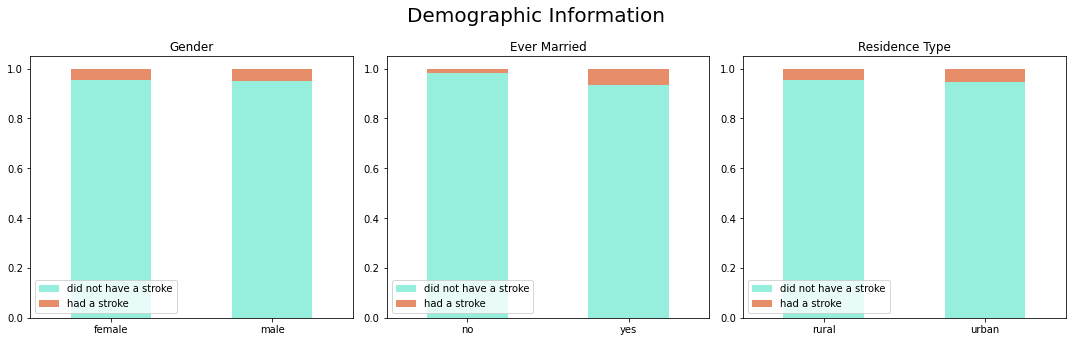

In [28]:
labels = ["did not have a stroke", "had a stroke"]

ax = plt.subplot(131)
plt.title('Gender')
pd.crosstab(df_stroke['gender'], df_stroke['stroke'], normalize = 'index').plot.bar(stacked = True, ax = ax, figsize = (15,5), color = ['#96EFDD', '#E78D69'], rot = 0).legend(["did not have a stroke", "had a stroke"])
plt.xlabel("  ")

ax = plt.subplot(132)
plt.title('Ever Married')
pd.crosstab(df_stroke['ever_married'], df_stroke['stroke'], normalize = 'index').plot.bar(stacked = True, ax = ax, figsize = (15,5), color = ['#96EFDD', '#E78D69'], rot = 0).legend(["did not have a stroke", "had a stroke"])
plt.xlabel("  ")

ax = plt.subplot(133)
plt.title('Residence Type')
pd.crosstab(df_stroke['residence_type'], df_stroke['stroke'], normalize = 'index').plot.bar(stacked = True, ax = ax, figsize = (15,5), color = ['#96EFDD', '#E78D69'], rot = 0).legend(["did not have a stroke", "had a stroke"])
plt.xlabel("  ")

plt.suptitle("Demographic Information", fontsize = 20)

plt.tight_layout()

As shown above, each bar is a category of the independent variable, and it is subdivided to show the proportion of each response class.<br>

<b>We can extract the following conclusions by analyzing demographic attributes:</b>
<br>
(1) We do not expect gender to have significant predictive power. A similar percentage of stroke is shown both when a predict is a Female or Male.<br>
(2) The stroke rate of married patient is almost double that of unmarried patient.<br>
(3) The stroke rate of patient who lives in rural environment is almost the same as who lives in urban environment.

### Patient Health Information:
As we did with demographic attributes, we evaluate the percentage of stroke for each category of the patient health attributes (Hypertension, Heart disease and Smoking status).

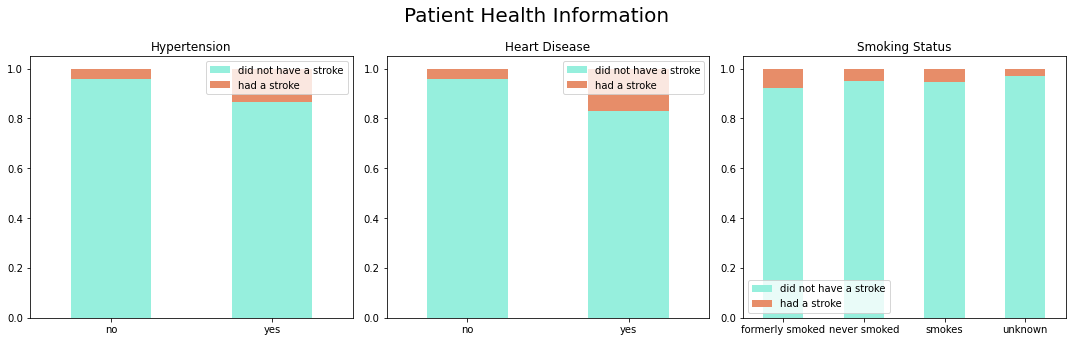

In [29]:
labels = ["did not have a stroke", "had a stroke"]
index = ['No', 'Yes']

ax = plt.subplot(131)
plt.title('Hypertension')
pd.crosstab(df_stroke['hypertension'], df_stroke['stroke'], normalize = 'index').plot.bar(stacked = True, ax = ax, figsize = (15,5), color = ['#96EFDD', '#E78D69'], rot = 0).legend(["did not have a stroke", "had a stroke"])
plt.xlabel("  ")

ax = plt.subplot(132)
plt.title('Heart Disease')
pd.crosstab(df_stroke['heart_disease'], df_stroke['stroke'], normalize = 'index').plot.bar(stacked = True, ax = ax, figsize = (15,5), color = ['#96EFDD', '#E78D69'], rot = 0).legend(["did not have a stroke", "had a stroke"])
plt.xlabel("  ")

ax = plt.subplot(133)
plt.title('Smoking Status')
pd.crosstab(df_stroke['smoking_status'], df_stroke['stroke'], normalize = 'index').plot.bar(stacked = True, ax = ax, figsize = (15,5) ,color = ['#96EFDD', '#E78D69'], rot = 0).legend(["did not have a stroke", "had a stroke"])
plt.xlabel("  ")

plt.suptitle("Patient Health Information", fontsize = 20)

plt.tight_layout()

<b>We can extract the following conclusions by analyzing patient health attributes:</b><br>
(1) Patients with hypertension, have a higher stroke rates compared to patients who without hypertension.<br>
(2) Patients with heart disease, have a higher stroke rates compared to patients who without heart disease.<br>
(3) Patients who formerly smoked have higher stroke rates compared to patients who never smoke.

<br>
<br>
<hr class="dotted">
<br>
<br>

# 4. Feature Importance

### Mutual information — analysis of linear and nonlinear relationships
Mutual information measures the mutual dependency between two variables based on entropy estimations.<br> 
In machine learning, we are interested in evaluating the degree of dependency between each independent variable and the response variable.<br>
Higher values of mutual information show a higher degree of dependency which indicates that the independent variable will be useful for predicting the target.

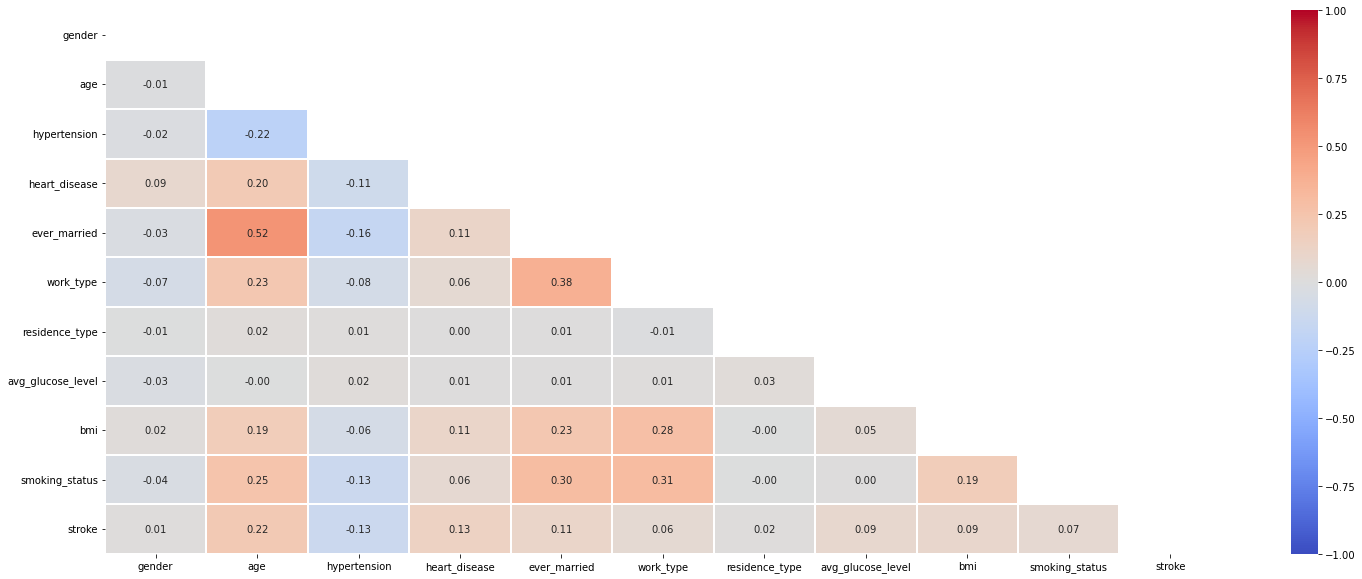

In [30]:
# Correlation between all variables:
plt.figure(5, figsize = (25, 10))
corr = df_stroke.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
ax = sns.heatmap(corr, mask = mask, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, linewidths = .2, fmt = ".2f", cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.show()

Mutual information allows us not only to better understand our data but also to identify the predictor variables that are completely independent of the target.<br> 
As shown above, gender and residence_type, have a mutual information score really close to 0, meaning those variables do not have a strong relationship with the target. 

 In the following steps, we should consider removing those variables from the data set before training as they do not provide useful information for predicting the outcome.

<h2><center>***</center></h2>

### Age Distribution And Stroke
Plot the Age frequencies of the patients.

In [31]:
df_stroke['age'].describe()

count    5109.000000
mean       43.218634
std        22.634799
min         0.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

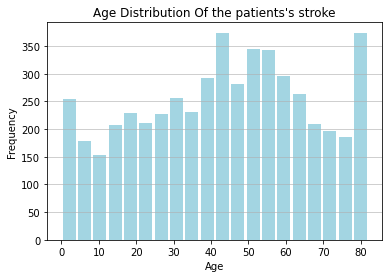

In [32]:
plt.hist(x = df_stroke['age'].dropna(), bins = 'auto', color = '#49ADC6',alpha = 0.5, rwidth = 0.85)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Age Distribution Of the patients's stroke")
plt.show()

We can see that the majority of ages is 80 and between 40 to 60 , that implies that the majority are grown people.

##### Age Group Distribution And Stroke:
Create a new variable (column) that will divide the patients in five age categories:

- Babies: 0-5
- Children: 6-12 years old
- Young: 13-17 years old
- Adult: 18-59 years old
- Older: 60+ years old

How many (number and percent) of stroke on each age group? 

In [33]:
### Create the categorical variables called "age_group"
df_stroke['age_group'] = None
df_stroke.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,male,67,no,yes,yes,private,urban,228,36,formerly smoked,1,None
1,female,61,no,no,yes,self employed,rural,202,-1,never smoked,1,None
2,male,80,no,yes,yes,private,rural,105,32,never smoked,1,None
3,female,49,no,no,yes,private,urban,171,34,smokes,1,None
4,female,79,yes,no,yes,self employed,rural,174,24,never smoked,1,None


In [34]:
# Insert values to each line as above:
# '0-5'
# '6-12'
# ...
df_stroke.loc[(df_stroke['age'] < 6), 'age_group'] = '0-5'
df_stroke.loc[(df_stroke['age'] >= 6) &(df_stroke['age'] < 13), 'age_group'] = '6-12'
df_stroke.loc[(df_stroke['age'] >= 13) & (df_stroke['age'] < 18), 'age_group'] = '13-17'
df_stroke.loc[(df_stroke['age'] >= 18) & (df_stroke['age'] < 60), 'age_group'] = '18-59'
df_stroke.loc[(df_stroke['age'] >= 60), 'age_group'] = '60+'
df_stroke.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,male,67,no,yes,yes,private,urban,228,36,formerly smoked,1,60+
1,female,61,no,no,yes,self employed,rural,202,-1,never smoked,1,60+
2,male,80,no,yes,yes,private,rural,105,32,never smoked,1,60+
3,female,49,no,no,yes,private,urban,171,34,smokes,1,18-59
4,female,79,yes,no,yes,self employed,rural,174,24,never smoked,1,60+


In [35]:
df_stroke.groupby('age_group').agg({'stroke':['count', 'sum', 'mean']})

stroke               
           count  sum      mean
age_group                      
0-5          320    1  0.003125
13-17        268    1  0.003731
18-59       2877   66  0.022941
6-12         268    0  0.000000
60+         1376  181  0.131541

Basicly the older you are, the chances to get stroke are bigger.

### BMI Distribution And Stroke
Plot the BMI frequencies of the patients.

In [36]:
df_stroke['bmi'].drop((df_stroke[df_stroke['bmi'] == -1]).index).describe()

count    4908.000000
mean       28.449878
std         7.844093
min        10.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        97.000000
Name: bmi, dtype: float64

C:\Users\alina\anaconda3\fgdftdf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

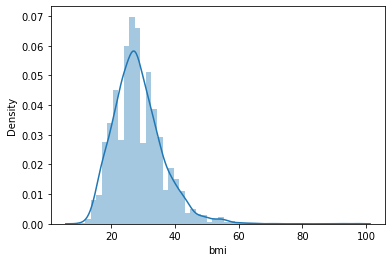

In [37]:
sns.distplot(df_stroke['bmi'].drop(df_stroke[df_stroke['bmi'] == -1].index))

We can see that the majority of BMI is 28, that implies that the majority are patients with overweight.

##### BNI Range Group Distribution And Stroke:
Create a new variable (column) that will divide the patients in four BMI range categories:

- Underweight: less than 18
- Healthy Weight: 18-24 
- Overweight: 25-29
- Obese: 30+

How many (number and percent) of stroke on each BMI range group? 

In [38]:
### Create the categorical variables called "bmi_range"
df_stroke['bmi_range'] = None
df_stroke.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_range
0,male,67,no,yes,yes,private,urban,228,36,formerly smoked,1,60+,None
1,female,61,no,no,yes,self employed,rural,202,-1,never smoked,1,60+,None
2,male,80,no,yes,yes,private,rural,105,32,never smoked,1,60+,None
3,female,49,no,no,yes,private,urban,171,34,smokes,1,18-59,None
4,female,79,yes,no,yes,self employed,rural,174,24,never smoked,1,60+,None


In [39]:
# Insert values to each line as above:
df_stroke.loc[(df_stroke['bmi'] < 18), 'bmi_range'] = 'underweight'
df_stroke.loc[(df_stroke['bmi'] >= 18) &(df_stroke['bmi'] < 25), 'bmi_range'] = 'healthy weight'
df_stroke.loc[(df_stroke['bmi'] >= 25) & (df_stroke['bmi'] < 30), 'bmi_range'] = 'overweight'
df_stroke.loc[(df_stroke['bmi'] >= 30), 'bmi_range'] = 'obese'
df_stroke.loc[(df_stroke['bmi'] == -1), 'bmi_range'] = 'unknown'
df_stroke.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_range
0,male,67,no,yes,yes,private,urban,228,36,formerly smoked,1,60+,obese
1,female,61,no,no,yes,self employed,rural,202,-1,never smoked,1,60+,unknown
2,male,80,no,yes,yes,private,rural,105,32,never smoked,1,60+,obese
3,female,49,no,no,yes,private,urban,171,34,smokes,1,18-59,obese
4,female,79,yes,no,yes,self employed,rural,174,24,never smoked,1,60+,healthy weight


In [40]:
df_stroke.groupby('bmi_range').agg({'stroke':['count', 'sum', 'mean']})

stroke              
                count sum      mean
bmi_range                          
healthy weight   1306  35  0.026799
obese            1920  98  0.051042
overweight       1409  75  0.053229
underweight       273   1  0.003663
unknown           201  40  0.199005

It can be understood that when the patients are in the range beyond a healthy BMI, they have a higher chance of getting a stroke.

### Gender Distribution And Stroke

In [41]:
df_stroke.groupby('gender').agg({'stroke':['count', 'sum', 'mean']})

stroke               
        count  sum      mean
gender                      
female   2994  141  0.047094
male     2115  108  0.051064

<h6><center><img src="https://transportgenderobservatory.eu/wp-content/uploads/2021/02/4003629-01.png"/></center></h6>

We can already see that there are no differences between the groups.<br>
From this, it can be understood that 'gender' Feature does not have much effect on the chance of getting a stroke.

### Hypertension Distribution, Heart Disease Distribution And Stroke

In [42]:
df_stroke.groupby('hypertension').agg({'stroke':['count', 'sum', 'mean']})

stroke               
              count  sum      mean
hypertension                      
no             4611  183  0.039688
yes             498   66  0.132530

In [43]:
df_stroke.groupby('heart_disease').agg({'stroke':['count', 'sum', 'mean']})

stroke               
               count  sum      mean
heart_disease                      
no              4833  202  0.041796
yes              276   47  0.170290

The patients who have a health background with diseases, are more likely to get a stroke.

### Ever Married Distribution And Stroke

In [44]:
df_stroke.groupby('ever_married').agg({'stroke':['count', 'sum', 'mean']})

stroke               
              count  sum      mean
ever_married                      
no             1756   29  0.016515
yes            3353  220  0.065613

Patients who were married were more likely to get a stroke than Patients who were not married.

### Work Type Distribution And Stroke

In [45]:
df_stroke.groupby('work_type').agg({'stroke':['count', 'sum', 'mean']})

stroke               
               count  sum      mean
work_type                          
children         687    2  0.002911
govt job         657   33  0.050228
never worked      22    0  0.000000
private         2924  149  0.050958
self employed    819   65  0.079365

Patients who do not have a job, have no chance of getting a stroke.

### Smoking Status Distribution And Stroke

In [46]:
df_stroke.groupby('smoking_status').agg({'stroke':['count', 'sum', 'mean']})

stroke              
                 count sum      mean
smoking_status                      
formerly smoked    884  70  0.079186
never smoked      1892  90  0.047569
smokes             789  42  0.053232
unknown           1544  47  0.030440

Patients who have never smoked or are smokers have a similar chance of getting a stroke.<br>
However, patients who are formerly smoked - have the highest chance of getting a stroke.

### Residence Type Distribution And Stroke

In [47]:
df_stroke.groupby('residence_type').agg({'stroke':['count', 'sum', 'mean']})

stroke               
                count  sum      mean
residence_type                      
rural            2513  114  0.045364
urban            2596  135  0.052003

We can already see that there are no differences between the groups.<br>
From this, it can be understood that 'residence_type' Feature does not have much effect on the chance of getting a stroke.

<br>
<br>
<hr class="dotted">
<br>
<br>

# 5. Feature Engineering

### Average Glucose Level Distribution And Stroke

In [48]:
df_stroke['avg_glucose_level'].describe()

count    5109.000000
mean      105.651008
std        45.276707
min        55.000000
25%        77.000000
50%        91.000000
75%       114.000000
max       271.000000
Name: avg_glucose_level, dtype: float64

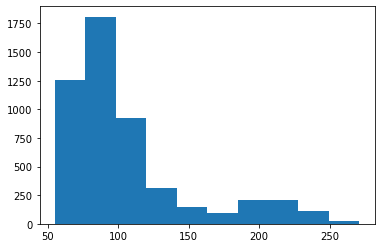

In [49]:
plt.hist(df_stroke['avg_glucose_level'])
plt.show()

It can be seen that most patients are below 100.

##### Average Glucose Level Per Age Group Distribution And Stroke:
Create a new variable (column) that will divide the patients in three Average Glucose Level Per Age Group categories:

- Low
- Normal
- High

<b>where there differences in average glucose level rates among the same age group?</b>

In [50]:
age_group_group = df_stroke.groupby('age_group')
age_group_group['avg_glucose_level'].describe()

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
0-5,320.0,93.450000,26.027427,55.0,75.0,89.5,108.25,206.0
13-17,268.0,95.097015,29.519972,55.0,75.0,88.0,111.00,233.0
18-59,2877.0,101.613486,40.364327,55.0,76.0,90.0,111.00,267.0
6-12,268.0,93.242537,25.941394,55.0,76.0,88.0,107.00,213.0
60+,1376.0,121.402616,58.153321,55.0,79.0,96.0,174.00,271.0


Definitely Yes, we can see that people in the same age group have different avg_glucose_level rates.

<b>Does those differences affect the chance of getting the stroke?</b>

In [51]:
# Create a new Variable "avg_glucose_level_per_age_group".
# We will use the data on the desctiptive table to divide the avg_glucose_level_per_age_group:
# Those who have more avg_glucose_level rate than the 75% where considered 'high', 
# If avg_glucose_level rate less than the 25% where categorized as 'low', else 'Normal'.

df_stroke['avg_glucose_level_per_age_group'] = 'normal'

df_stroke.loc[(df_stroke['avg_glucose_level'] < 75.00) & (df_stroke['age_group'] == '0-5') , 'avg_glucose_level_per_age_group'] = 'low'
df_stroke.loc[(df_stroke['avg_glucose_level'] > 108.25) & (df_stroke['age_group'] == '0-5'), 'avg_glucose_level_per_age_group'] = 'high'

df_stroke.loc[(df_stroke['avg_glucose_level'] < 76.00) & (df_stroke['age_group'] == '6-12') , 'avg_glucose_level_per_age_group'] = 'low'
df_stroke.loc[(df_stroke['avg_glucose_level'] > 107.00) & (df_stroke['age_group'] == '6-12'), 'avg_glucose_level_per_age_group'] = 'high'

df_stroke.loc[(df_stroke['avg_glucose_level'] < 75.00) & (df_stroke['age_group'] == '13-17') , 'avg_glucose_level_per_age_group'] = 'low'
df_stroke.loc[(df_stroke['avg_glucose_level'] > 111.00) & (df_stroke['age_group'] == '13-17'), 'avg_glucose_level_per_age_group'] = 'high'

df_stroke.loc[(df_stroke['avg_glucose_level'] < 76.00) & (df_stroke['age_group'] == '18-59') , 'avg_glucose_level_per_age_group'] = 'low'
df_stroke.loc[(df_stroke['avg_glucose_level'] > 111.00) & (df_stroke['age_group'] == '18-59'), 'avg_glucose_level_per_age_group'] = 'high'

df_stroke.loc[(df_stroke['avg_glucose_level'] < 79.00) & (df_stroke['age_group'] == '60+') , 'avg_glucose_level_per_age_group'] = 'low'
df_stroke.loc[(df_stroke['avg_glucose_level'] > 174.00) & (df_stroke['age_group'] == '60+'), 'avg_glucose_level_per_age_group'] = 'high'

df_stroke.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_range,avg_glucose_level_per_age_group
0,male,67,no,yes,yes,private,urban,228,36,formerly smoked,1,60+,obese,high
1,female,61,no,no,yes,self employed,rural,202,-1,never smoked,1,60+,unknown,high
2,male,80,no,yes,yes,private,rural,105,32,never smoked,1,60+,obese,normal
3,female,49,no,no,yes,private,urban,171,34,smokes,1,18-59,obese,high
4,female,79,yes,no,yes,self employed,rural,174,24,never smoked,1,60+,healthy weight,normal


In [52]:
df_stroke.groupby(['age_group', 'avg_glucose_level_per_age_group']).agg({'stroke':['count', 'sum', 'mean']})

stroke              
                                           count sum      mean
age_group avg_glucose_level_per_age_group                     
0-5       high                                80   0  0.000000
          low                                 74   1  0.013514
          normal                             166   0  0.000000
13-17     high                                66   0  0.000000
          low                                 65   1  0.015385
          normal                             137   0  0.000000
18-59     high                               688  24  0.034884
          low                                682  12  0.017595
          normal                            1507  30  0.019907
6-12      high                                66   0  0.000000
          low                                 62   0  0.000000
          normal                             140   0  0.000000
60+       high                               343  65  0.189504
          low                                341  44  0.129032
          normal                             692  72  0.104046

The patients who with age between 0-5 or 13-17 and with normal blood sugar, are more likely to get stroke.<br>
However, people who are over the age of 18 and have a high average glucose level, are more likely to get a stroke.<br>
For the '6-12' age group, no matter what the blood glucose level was, they are not likely to get a stroke.

<h3><center>   </center></h3>

### Health Condition Distribution And Stroke
Where there differences on stroke by hypertension and heart disease?

In [53]:
df_stroke.groupby(['heart_disease', 'hypertension']).agg({'stroke':['count', 'sum', 'mean']})

stroke               
                            count  sum      mean
heart_disease hypertension                      
no            no             4399  149  0.033871
              yes             434   53  0.122120
yes           no              212   34  0.160377
              yes              64   13  0.203125

##### Health Condition Group Distribution And Stroke:
Create a new variable (column) that will divide the patients in two health_condition Group categories:

- No diseases
- There are diseases

In [54]:
### Create the categorical variables called "avg_glucose_level_per_age_group"
df_stroke['health_condition'] = None
df_stroke.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_range,avg_glucose_level_per_age_group,health_condition
0,male,67,no,yes,yes,private,urban,228,36,formerly smoked,1,60+,obese,high,None
1,female,61,no,no,yes,self employed,rural,202,-1,never smoked,1,60+,unknown,high,None
2,male,80,no,yes,yes,private,rural,105,32,never smoked,1,60+,obese,normal,None
3,female,49,no,no,yes,private,urban,171,34,smokes,1,18-59,obese,high,None
4,female,79,yes,no,yes,self employed,rural,174,24,never smoked,1,60+,healthy weight,normal,None


In [55]:
# Insert values to each line as above:
df_stroke.loc[(df_stroke['hypertension'] == 'yes') & (df_stroke['heart_disease'] == 'yes') , 'health_condition'] = 'there are diseases'
df_stroke.loc[(df_stroke['hypertension'] == 'yes') & (df_stroke['heart_disease'] == 'no') , 'health_condition'] = 'there are diseases'
df_stroke.loc[(df_stroke['hypertension'] == 'no') & (df_stroke['heart_disease'] == 'yes') , 'health_condition'] = 'there are diseases'
df_stroke.loc[(df_stroke['hypertension'] == 'no') & (df_stroke['heart_disease'] == 'no') , 'health_condition'] = 'no diseases'
df_stroke.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_range,avg_glucose_level_per_age_group,health_condition
0,male,67,no,yes,yes,private,urban,228,36,formerly smoked,1,60+,obese,high,there are diseases
1,female,61,no,no,yes,self employed,rural,202,-1,never smoked,1,60+,unknown,high,no diseases
2,male,80,no,yes,yes,private,rural,105,32,never smoked,1,60+,obese,normal,there are diseases
3,female,49,no,no,yes,private,urban,171,34,smokes,1,18-59,obese,high,no diseases
4,female,79,yes,no,yes,self employed,rural,174,24,never smoked,1,60+,healthy weight,normal,there are diseases


In [56]:
df_stroke.groupby('health_condition').agg({'stroke':['count', 'sum', 'mean']})

stroke               
                    count  sum      mean
health_condition                        
no diseases          4399  149  0.033871
there are diseases    710  100  0.140845

Patients with diseases have a higher chance of having a stroke.

<h2><center>***</center></h2>

Feature engineering is the process of extracting features from the data and transforming them into a format that is suitable for the machine learning model.<br> 
In this project, we need to transform both numerical and categorical variables.<br>
Most machine learning algorithms require numerical values; therefore, all categorical attributes available in the dataset should be encoded into numerical labels before training the model. In addition, we need to transform numeric columns into a common scale.<br>
This will prevent that the columns with large values dominate the learning process. 

### Label Encoding
Label encoding is used to replace categorical values with numerical values.<br> 
This encoding replaces every category with a numerical label.<br> 

<b>In this project, we use label encoding with the following binary variables:</b> <br>
(1) gender <br>
(2) hypertension <br>
(3) heart_disease <br>
(4) ever_married <br>
(5) residence_type <br>
(6) health_condition

In [57]:
df_stroke['gender'] = df_stroke['gender'].map({'male':0, 'female':1})
df_stroke['hypertension'] = df_stroke['hypertension'].map({'no':0, 'yes':1})
df_stroke['heart_disease'] = df_stroke['heart_disease'].map({'no':0, 'yes':1})
df_stroke['ever_married'] = df_stroke['ever_married'].map({'no':0, 'yes':1})
df_stroke['residence_type'] = df_stroke['residence_type'].map({'urban':0, 'rural':1})
df_stroke['health_condition'] = df_stroke['health_condition'].map({'no diseases':0, 'there are diseases':1})

#### Correlation to label:

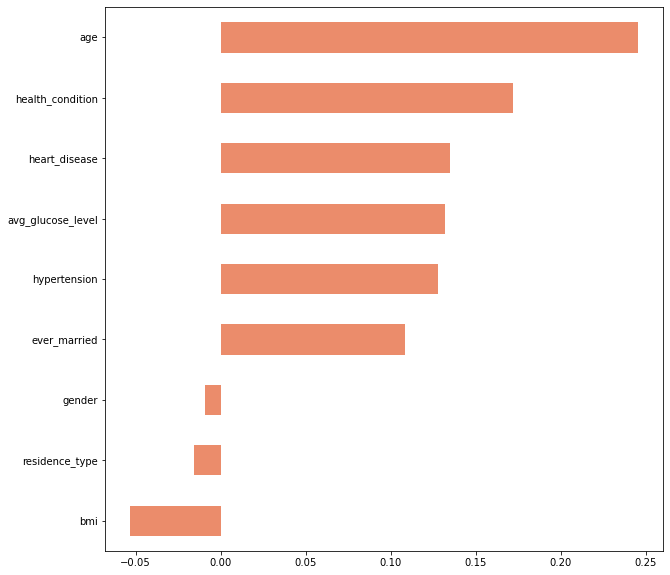

In [58]:
df_stroke.corr()['stroke'].drop('stroke').sort_values(ascending = True).plot(kind = 'barh', color = ['#EB8C6B'], figsize = (10, 10))
plt.show()

In [59]:
# These two features show low corelation to the label:
df_stroke.drop(columns = 'gender', inplace = True)
df_stroke.drop(columns = 'residence_type', inplace = True)

### One-Hot Encoding
One-hot encoding creates a new binary column for each level of the categorical variable.<br> 
The new column contains zeros and ones indicating the absence or presence of the category in the data.<br> 

<b>In this project, we apply one-hot encoding to the following categorical variables:</b><br> 
(1) work_type<br>
(2) smoking_status<br>
(3) avg_glucose_level_per_age_group<br>
(4) age_group<br>
(5) bmi_range

The main drawback of this encoding is the significant increase in the dimensionality of the dataset (curse of dimensionality); therefore, this method should be avoided when the categorical column has a large number of unique values.

In [60]:
# one-hot encoding (categorical variables with more than two levels):
one_hot_encoding_columns = ['work_type', 'smoking_status', 'avg_glucose_level_per_age_group', 'bmi_range', 'age_group']

In [61]:
# encode categorical variables with more than two levels using one-hot encoding:
df_stroke_transformed = pd.get_dummies(df_stroke, columns = one_hot_encoding_columns)
df_stroke_transformed = df_stroke_transformed.rename(columns = str.lower)
df_stroke_transformed.head(5)

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,health_condition,work_type_children,work_type_govt job,...,bmi_range_healthy weight,bmi_range_obese,bmi_range_overweight,bmi_range_underweight,bmi_range_unknown,age_group_0-5,age_group_13-17,age_group_18-59,age_group_6-12,age_group_60+
0,67,0,1,1,228,36,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,61,0,0,1,202,-1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,80,0,1,1,105,32,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,49,0,0,1,171,34,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,79,1,0,1,174,24,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1


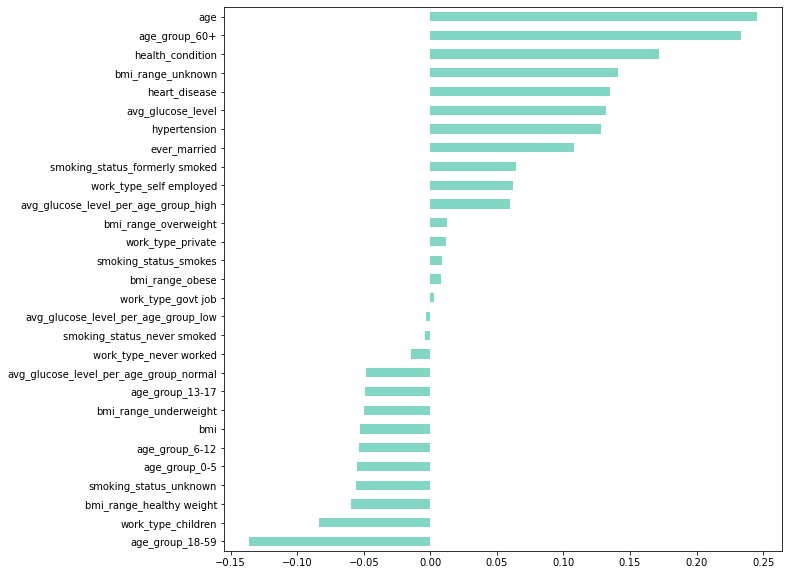

In [62]:
df_stroke_transformed.corr()['stroke'].drop('stroke').sort_values(ascending = True).plot(kind = 'barh', color = ['#82D6C4'], figsize = (10, 10))
plt.show()

As shown above, work_type_never worked, work_type_govt job, smoking_status_never smoked, work_type_private, smoking_status_smokes, avg_glucose_level_per_age_group_low, bmi_range_obese and bmi_range_overweight, have a mutual information score really close to 0, meaning those variables do not have a strong relationship with the target.
we should removing those variables from the data set before training as they do not provide useful information for predicting the outcome.

In [63]:
# These features show low corelation to the label:
df_stroke_transformed.drop(columns = 'work_type_never worked', inplace = True)
df_stroke_transformed.drop(columns = 'smoking_status_never smoked', inplace = True)
df_stroke_transformed.drop(columns = 'work_type_private', inplace = True)
df_stroke_transformed.drop(columns = 'smoking_status_smokes', inplace = True)
df_stroke_transformed.drop(columns = 'avg_glucose_level_per_age_group_low', inplace = True)
df_stroke_transformed.drop(columns = 'bmi_range_obese', inplace = True)
df_stroke_transformed.drop(columns = 'bmi_range_overweight', inplace = True)
df_stroke_transformed.drop(columns = 'work_type_govt job', inplace = True)

<br>
<br>
<hr class="dotted">
<br>
<br>

# 6. Splitting The Data In Training And Testing Sets

The first step when building a model is to split the data into two groups, which are typically referred to as training and testing sets.<br> 
The training set is used by the machine learning algorithm to build the model.<br> 
The test set contains samples that are not part of the learning process and is used to evaluate the model’s performance. 

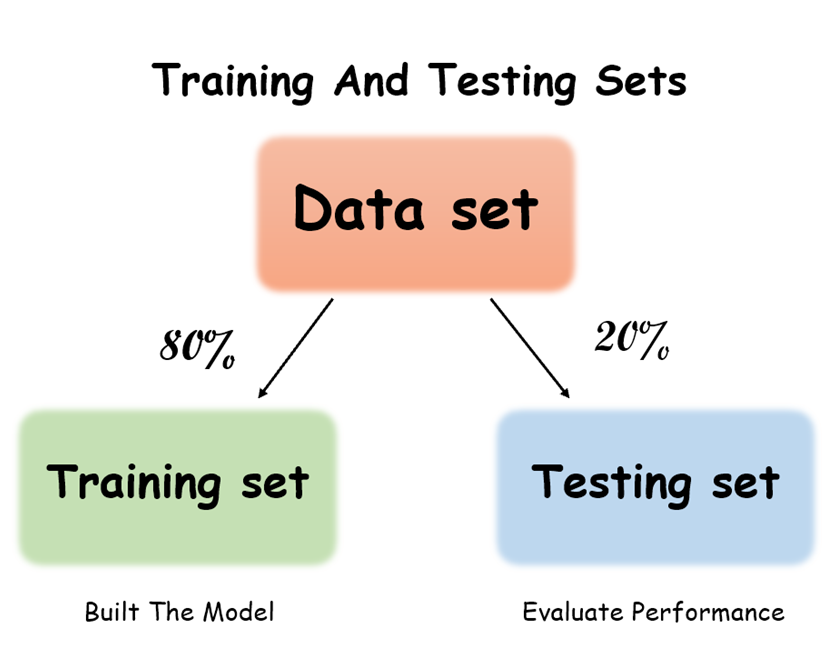

In [64]:
# Let's see df_stroke_transformed dataframe:
df_stroke_transformed

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,health_condition,work_type_children,work_type_self employed,...,avg_glucose_level_per_age_group_high,avg_glucose_level_per_age_group_normal,bmi_range_healthy weight,bmi_range_underweight,bmi_range_unknown,age_group_0-5,age_group_13-17,age_group_18-59,age_group_6-12,age_group_60+
0,67,0,1,1,228,36,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,61,0,0,1,202,-1,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
2,80,0,1,1,105,32,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,49,0,0,1,171,34,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,79,1,0,1,174,24,1,1,0,1,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,80,1,0,1,83,-1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
5105,81,0,0,1,125,40,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
5106,35,0,0,1,82,30,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
5107,51,0,0,1,166,25,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


We only have 5109 examples, let's use 20% for test and the rest for train and split to inputs and labels.

<h2><center>***</center></h2>

First, we create a variable X to store the independent attributes of the dataset.<br> 
Additionally, we create a variable y to store only the target variable (Stroke).

In [65]:
# We are going to use in this case - Scikit-Learn which is the most popular library for machine learning in Python. 
# It includes functions for read, write and manipulate data, as lots of optimized machine learning algorithms.

# select independent variables:
x = df_stroke_transformed.drop(columns = 'stroke') 

# select dependent variables:
y = df_stroke_transformed.loc[:, 'stroke'] # Label

In [66]:
# Prove that the variables were selected correctly:
print(x.columns)

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'health_condition', 'work_type_children',
       'work_type_self employed', 'smoking_status_formerly smoked',
       'smoking_status_unknown', 'avg_glucose_level_per_age_group_high',
       'avg_glucose_level_per_age_group_normal', 'bmi_range_healthy weight',
       'bmi_range_underweight', 'bmi_range_unknown', 'age_group_0-5',
       'age_group_13-17', 'age_group_18-59', 'age_group_6-12',
       'age_group_60+'],
      dtype='object')


In [67]:
# Prove that the variables were selected correctly:
print(y.name)

stroke


Then, we can use the train_test_split function from the sklearn.model_selection package to create both the training and testing sets.

In [68]:
from sklearn.model_selection import train_test_split

# split the data in training and testing sets:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, shuffle = True)

In [69]:
x_train

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,health_condition,work_type_children,work_type_self employed,smoking_status_formerly smoked,...,avg_glucose_level_per_age_group_high,avg_glucose_level_per_age_group_normal,bmi_range_healthy weight,bmi_range_underweight,bmi_range_unknown,age_group_0-5,age_group_13-17,age_group_18-59,age_group_6-12,age_group_60+
1547,59,0,1,1,194,30,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4975,18,0,0,0,101,46,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
246,75,0,0,1,78,29,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
2824,41,0,0,1,97,25,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3798,40,0,0,1,92,38,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,28,1,0,0,86,38,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3264,61,0,0,1,81,29,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1653,44,0,0,1,94,28,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2607,21,0,0,0,120,29,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [70]:
y_train

1547    0
4975    0
246     1
2824    0
3798    0
       ..
4931    0
3264    0
1653    0
2607    0
2732    0
Name: stroke, Length: 4087, dtype: int64

In [71]:
x_test

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,health_condition,work_type_children,work_type_self employed,smoking_status_formerly smoked,...,avg_glucose_level_per_age_group_high,avg_glucose_level_per_age_group_normal,bmi_range_healthy weight,bmi_range_underweight,bmi_range_unknown,age_group_0-5,age_group_13-17,age_group_18-59,age_group_6-12,age_group_60+
42,82,0,1,1,144,26,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
380,4,0,0,0,106,16,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
1559,53,0,0,1,72,66,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
352,20,0,0,0,96,34,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3638,51,1,0,1,85,31,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576,20,0,0,0,98,21,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
660,52,0,0,0,69,36,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
57,78,0,0,1,237,-1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
4266,36,0,0,1,119,37,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [72]:
y_test

42      1
380     0
1559    0
352     0
3638    0
       ..
3576    0
660     0
57      1
4266    0
4763    0
Name: stroke, Length: 1022, dtype: int64

<br>
<br>
<hr class="dotted">
<br>
<br>

# 7. Assessing Multiple Algorithms

Algorithm selection is a key challenge in any machine learning project since there is not an algorithm that is the best across all projects.<br> Generally, we need to evaluate a set of potential candidates and select for further evaluation those that provide better performance.

<b>In this project, we compare 3 different algorithms, all of them already implemented in Scikit-Learn:</b><br>
(1) Decision Tree<br> 
(2) Random Forest <br>
(3) K Nearest Neighbours<br>

## Accuracy

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 

def create_models(max_depth = 3):
    models = []
    models.append(('Decision_Tree_Classifier', DecisionTreeClassifier(random_state = max_depth)))
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('random_forest', RandomForestClassifier(random_state = max_depth)))
    return models

# create a list with all the algorithms we are going to assess
models = create_models()

# test the accuracy of each model using default hyperparameters
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    
    # fit the model with the training data
    model.fit(x_train, y_train).predict(x_test)
    
    # make predictions with the testing data
    predictions = model.predict(x_test)
    
    # calculate accuracy 
    accuracy = accuracy_score(y_test, predictions)
   
    results.append(accuracy)
    names.append(name)
 
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: Decision_Tree_Classifier, Accuracy: 0.9070450097847358)
Classifier: k_nearest_neighbors, Accuracy: 0.9442270058708415)
Classifier: random_forest, Accuracy: 0.9481409001956947)


<b>We can easily see that the "k_nearest_neighbors" and 'Random Forest' algorithms had the best result, "k_nearest_neighbors" on the other hand did poorly.</b>

## 7.1 Decision Tree:

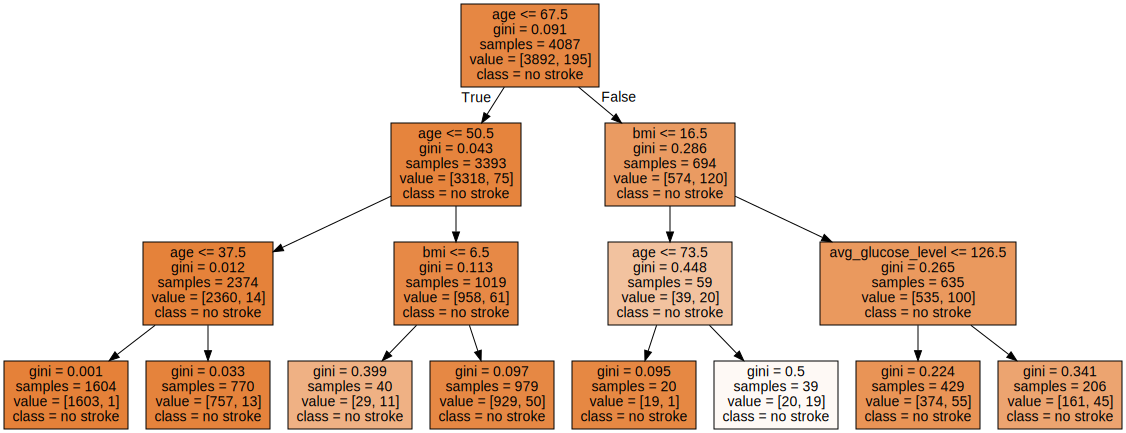

In [74]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# Let's see for depth = 3:
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(x_train, y_train) 
y_test_pred_DecisionTree = clf.predict(x_test) # making a prediction based on "test" data features
 
def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names = features, class_names = labels, filled = True))
    display(SVG(graph.pipe(format = 'svg')))
plot_tree(clf, x_train.columns, ['no stroke', 'stroke'])

<b>For example, a decision tree with depth 3:</b><br>
A feature which is on the top of the tree (in this case, 'age' feature) shows that this feature is important, which helps divide groups into more homogeneous groups.<br>
<br>
below that, we have gini: ranges from 0 to 1 - low values mean higher homogeneity while high values mean low homogeneity(low is better).<br>
samples: 4087 (x_train)<br>
value: 3892 did not get a atroke, and 195 got a atroke.<br>
class: who is more dominant in this case? 'stroke'.<br>
color: orange - no stroke, blue - stroke, white or close to white - we get 50% of each group.<br>

<b>The second step (True or False):</b><br>
For the condition that ,age <= 67.5, is true, the left arrow - the age is now less than 50.5.<br>
For the condition that ,age <= 67.5, is False, the right arrow - now, the condition changed to new feather 'bmi': all patients over the age of 67.5 and higher, and bmi <= 16.5.

## 7.2 Random Forest:

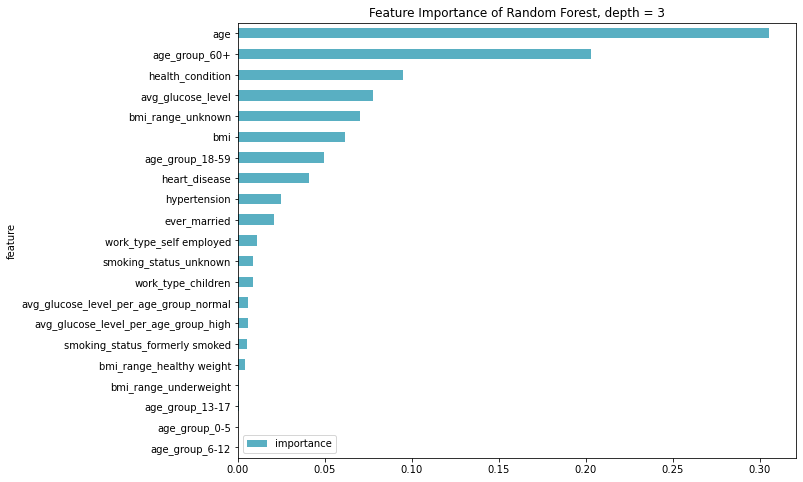

In [75]:
# Let's see for depth = 3:
model = RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state = 1)
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)

# Let's make a random forest feature importance:
feature_importances = model.feature_importances_ # applying the method "feature_importances_" on the algorithm

features = x_train.columns # all the features
stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) # creating the data frame

stats_sort = stats.sort_values('importance', ascending = True)
stats_sort.plot(y='importance', x = 'feature', kind = 'barh', color = ['#59AFC2'], figsize = (10,8))
plt.title('Feature Importance of Random Forest, depth = 3')
plt.show()

This is pretty aligned with what we saw in the correlations, so seems like the algorithm found the right patterns.

## 7.3 K Nearest Neighbours:

In [76]:
# Let's see for depth = 3:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(x_train, y_train) # running\training the algorithm with the train data
y_test_pred_Knn = clf.predict(x_test)

<br>
<br>
<hr class="dotted">
<br>
<br>

# 8. Overfitting
How do we improve our models ?

## 8.1 Decision Tree:

In [77]:
list_num = [3,4,5,6,7,8,9,10,11,12,13,14,15]
for num in list_num:
    clf = DecisionTreeClassifier(max_depth = num)
    clf.fit(x_train, y_train)
    y_test_pred_DecisionTree = clf.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_test_pred_DecisionTree)
    print('Classifier: Decision Tree, Max_Depth: {}, Accuracy: {})'.format(num, test_accuracy))

Classifier: Decision Tree, Max_Depth: 3, Accuracy: 0.9471624266144814)
Classifier: Decision Tree, Max_Depth: 4, Accuracy: 0.949119373776908)
Classifier: Decision Tree, Max_Depth: 5, Accuracy: 0.9461839530332681)
Classifier: Decision Tree, Max_Depth: 6, Accuracy: 0.9393346379647749)
Classifier: Decision Tree, Max_Depth: 7, Accuracy: 0.9432485322896281)
Classifier: Decision Tree, Max_Depth: 8, Accuracy: 0.9393346379647749)
Classifier: Decision Tree, Max_Depth: 9, Accuracy: 0.9324853228962818)
Classifier: Decision Tree, Max_Depth: 10, Accuracy: 0.9324853228962818)
Classifier: Decision Tree, Max_Depth: 11, Accuracy: 0.9246575342465754)
Classifier: Decision Tree, Max_Depth: 12, Accuracy: 0.9158512720156555)
Classifier: Decision Tree, Max_Depth: 13, Accuracy: 0.9148727984344422)
Classifier: Decision Tree, Max_Depth: 14, Accuracy: 0.9129158512720157)
Classifier: Decision Tree, Max_Depth: 15, Accuracy: 0.9060665362035225)


### <b>max_depth = 4 --> look like the best one</b>

## 8.2 Random Forest:

In [78]:
list_num = [100,70,50,30,15,10,9,8,7,6,5,4,3]
for num in list_num:
    model = RandomForestClassifier(n_estimators = num, max_depth = 3, random_state = 1)        
    model.fit(x_train, y_train)
    y_test_pred_RandomForest = model.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_test_pred_RandomForest)
    print('Classifier: Random Forest, n_estimators: {}, Accuracy: {})'.format(num, test_accuracy))

Classifier: Random Forest, n_estimators: 100, Accuracy: 0.9471624266144814)
Classifier: Random Forest, n_estimators: 70, Accuracy: 0.9471624266144814)
Classifier: Random Forest, n_estimators: 50, Accuracy: 0.9471624266144814)
Classifier: Random Forest, n_estimators: 30, Accuracy: 0.9471624266144814)
Classifier: Random Forest, n_estimators: 15, Accuracy: 0.9471624266144814)
Classifier: Random Forest, n_estimators: 10, Accuracy: 0.9471624266144814)
Classifier: Random Forest, n_estimators: 9, Accuracy: 0.9471624266144814)
Classifier: Random Forest, n_estimators: 8, Accuracy: 0.9471624266144814)
Classifier: Random Forest, n_estimators: 7, Accuracy: 0.9471624266144814)
Classifier: Random Forest, n_estimators: 6, Accuracy: 0.9471624266144814)
Classifier: Random Forest, n_estimators: 5, Accuracy: 0.9471624266144814)
Classifier: Random Forest, n_estimators: 4, Accuracy: 0.9471624266144814)
Classifier: Random Forest, n_estimators: 3, Accuracy: 0.9471624266144814)


<b>looks like "n_estimators" can be any number.</b>

#### Let's "play" with  "max_depth":

In [79]:
list_num = [3,4,5,6,7,8,9,10,11,12,13,14,15]
for num in list_num:
    model = RandomForestClassifier(n_estimators = 100, max_depth = num, random_state = 1)        
    model.fit(x_train, y_train)
    y_test_pred_RandomForest = model.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_test_pred_RandomForest)
    print('Classifier: Random Forest, max_depth: {}, Accuracy: {})'.format(num, test_accuracy))

Classifier: Random Forest, max_depth: 3, Accuracy: 0.9471624266144814)
Classifier: Random Forest, max_depth: 4, Accuracy: 0.9471624266144814)
Classifier: Random Forest, max_depth: 5, Accuracy: 0.9471624266144814)
Classifier: Random Forest, max_depth: 6, Accuracy: 0.9481409001956947)
Classifier: Random Forest, max_depth: 7, Accuracy: 0.9481409001956947)
Classifier: Random Forest, max_depth: 8, Accuracy: 0.949119373776908)
Classifier: Random Forest, max_depth: 9, Accuracy: 0.949119373776908)
Classifier: Random Forest, max_depth: 10, Accuracy: 0.949119373776908)
Classifier: Random Forest, max_depth: 11, Accuracy: 0.949119373776908)
Classifier: Random Forest, max_depth: 12, Accuracy: 0.9481409001956947)
Classifier: Random Forest, max_depth: 13, Accuracy: 0.9481409001956947)
Classifier: Random Forest, max_depth: 14, Accuracy: 0.9461839530332681)
Classifier: Random Forest, max_depth: 15, Accuracy: 0.9481409001956947)


### <b>We've improved our model! - max_depth can be between 8 to 11, this is a pretty good fit ~ 95%</b>

## 8.3 K Nearest Neighbours:

In [80]:
list_num = [3,4,5,6,7,8,9,10,11,12,13,14,15]
for num in list_num:
    clf = KNeighborsClassifier(n_neighbors = num)
    clf.fit(x_train, y_train)
    y_test_pred_Knn = clf.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_test_pred_Knn)
    print('Classifier: Decision Tree, Max_Depth: {}, Accuracy: {})'.format(num, test_accuracy))

Classifier: Decision Tree, Max_Depth: 3, Accuracy: 0.9344422700587084)
Classifier: Decision Tree, Max_Depth: 4, Accuracy: 0.9461839530332681)
Classifier: Decision Tree, Max_Depth: 5, Accuracy: 0.9442270058708415)
Classifier: Decision Tree, Max_Depth: 6, Accuracy: 0.9471624266144814)
Classifier: Decision Tree, Max_Depth: 7, Accuracy: 0.9461839530332681)
Classifier: Decision Tree, Max_Depth: 8, Accuracy: 0.9481409001956947)
Classifier: Decision Tree, Max_Depth: 9, Accuracy: 0.9471624266144814)
Classifier: Decision Tree, Max_Depth: 10, Accuracy: 0.9471624266144814)
Classifier: Decision Tree, Max_Depth: 11, Accuracy: 0.9452054794520548)
Classifier: Decision Tree, Max_Depth: 12, Accuracy: 0.9471624266144814)
Classifier: Decision Tree, Max_Depth: 13, Accuracy: 0.9461839530332681)
Classifier: Decision Tree, Max_Depth: 14, Accuracy: 0.9471624266144814)
Classifier: Decision Tree, Max_Depth: 15, Accuracy: 0.9481409001956947)


### <b>max_depth = 8 or 15 --> look like the best fit</b>

<br>
<br>
<hr class="dotted">
<br>
<br>

# 9. Evaluation And Benchmark

### The benchmark would be the most common label in the train set

In [81]:
y_train.value_counts()

0    3892
1     195
Name: stroke, dtype: int64

In [82]:
import numpy as np

def get_benchmark_predictions(x, benchmark_value):
    return np.ones(len(x))*benchmark_value
    
benchmark_value = 0
y_test_pred_Benchmark = get_benchmark_predictions(x_test, benchmark_value)
test_acc = accuracy_score(y_test, y_test_pred_Benchmark)
test_acc

0.9471624266144814

### Our model results:
Decision tree best accuracy Result: 94.9%<br>
Random Forest best accuracy Result: 94.9%<br>
Knn best accuracy Result: 94.8%<br>
## The performance on test is 94.7%, we can see, that any of our algorithms beat the benchmark performance